# VNA Data acquisition example
This notebook demonstrates how to acquire two port sparameters and wave parameters using pyMez

## Importing the pyMez API

In [1]:
from pyMez import *

Importing pyMez, this should take roughly 30 seconds
Importing Code.DataHandlers.GeneralModels
It took 3.525 s to import Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.HTMLModels
It took 0.585 s to import Code.DataHandlers.HTMLModels
Importing Code.DataHandlers.NISTModels
It took 8.69 s to import Code.DataHandlers.NISTModels
Importing Code.DataHandlers.TouchstoneModels
It took 0.007 s to import Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
It took 0.227 s to import Code.DataHandlers.XMLModels
Importing Code.DataHandlers.ZipModels
It took 0.037 s to import Code.DataHandlers.ZipModels
Importing Code.InstrumentControl.Experiments
It took 1.408 s to import Code.InstrumentControl.Experiments
Importing Code.InstrumentControl.Instruments
It took 0.029 s to import Code.InstrumentControl.Instruments
Importing Code.Utils.Names
It took 0.024 s to import Code.Utils.Names
It took 14.532 s to import all of the active modules


### Inspecting the GPIB bus to discover the instruments attached

In [2]:
whos_there()

Rohde&Schwarz,ZVA67-4Port,1312700403101122,3.90
 is at address GPIB0::20::INSTR


### Creating a control class instance for this vna
If there is an instrument description in pyMez/instruments then static metadata about this instrument will be loaded into the class, otherwise it will function as intended without the static metadata

In [3]:
vna=VNA("GPIB::20")

### Taking a two-port scattering parameter sweep with the preset values
The returned data will be in a touchstone style class

In [10]:
vna.initialize(reset=False)
s2p=vna.measure_sparameters()

### Plotting the data 
The touchstone style class has a show method that will display the two-port parameters in real-imaginary (RI), magnitude-angle (MA) or decibel-angle (DB)

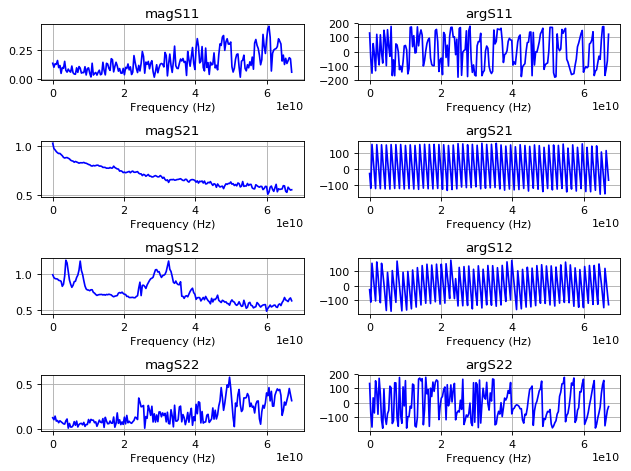

In [11]:
s2p.show(format="MA");

In [12]:
vna.get_state()

{'SENS:AVER': u'0',
 'SENS:BAND': u'10000',
 'SENS:CORR:STAT': u'0',
 'SENS:SWE:TYPE': u'LIN',
 'SOUR:POW': u'-10',
 'SOUR:POW:CORR:STAT': u'0',
 'SOUR:POW:SLOP': u'0'}

In [8]:
vna.write("SENS:CORR:STAT 0")

(18L, <StatusCode.success: 0>)

### Taking two-port wave parameters
Taking two port wave parameters works the same way, but uses the methods .initialize_w2p and .measure_w2p

In [13]:
vna.initialize_w2p()
w2p=vna.measure_w2p()

### Plotting the two-port wave parameters 
The W2P class also has a show method. It is a child of the AsciiDataTable class

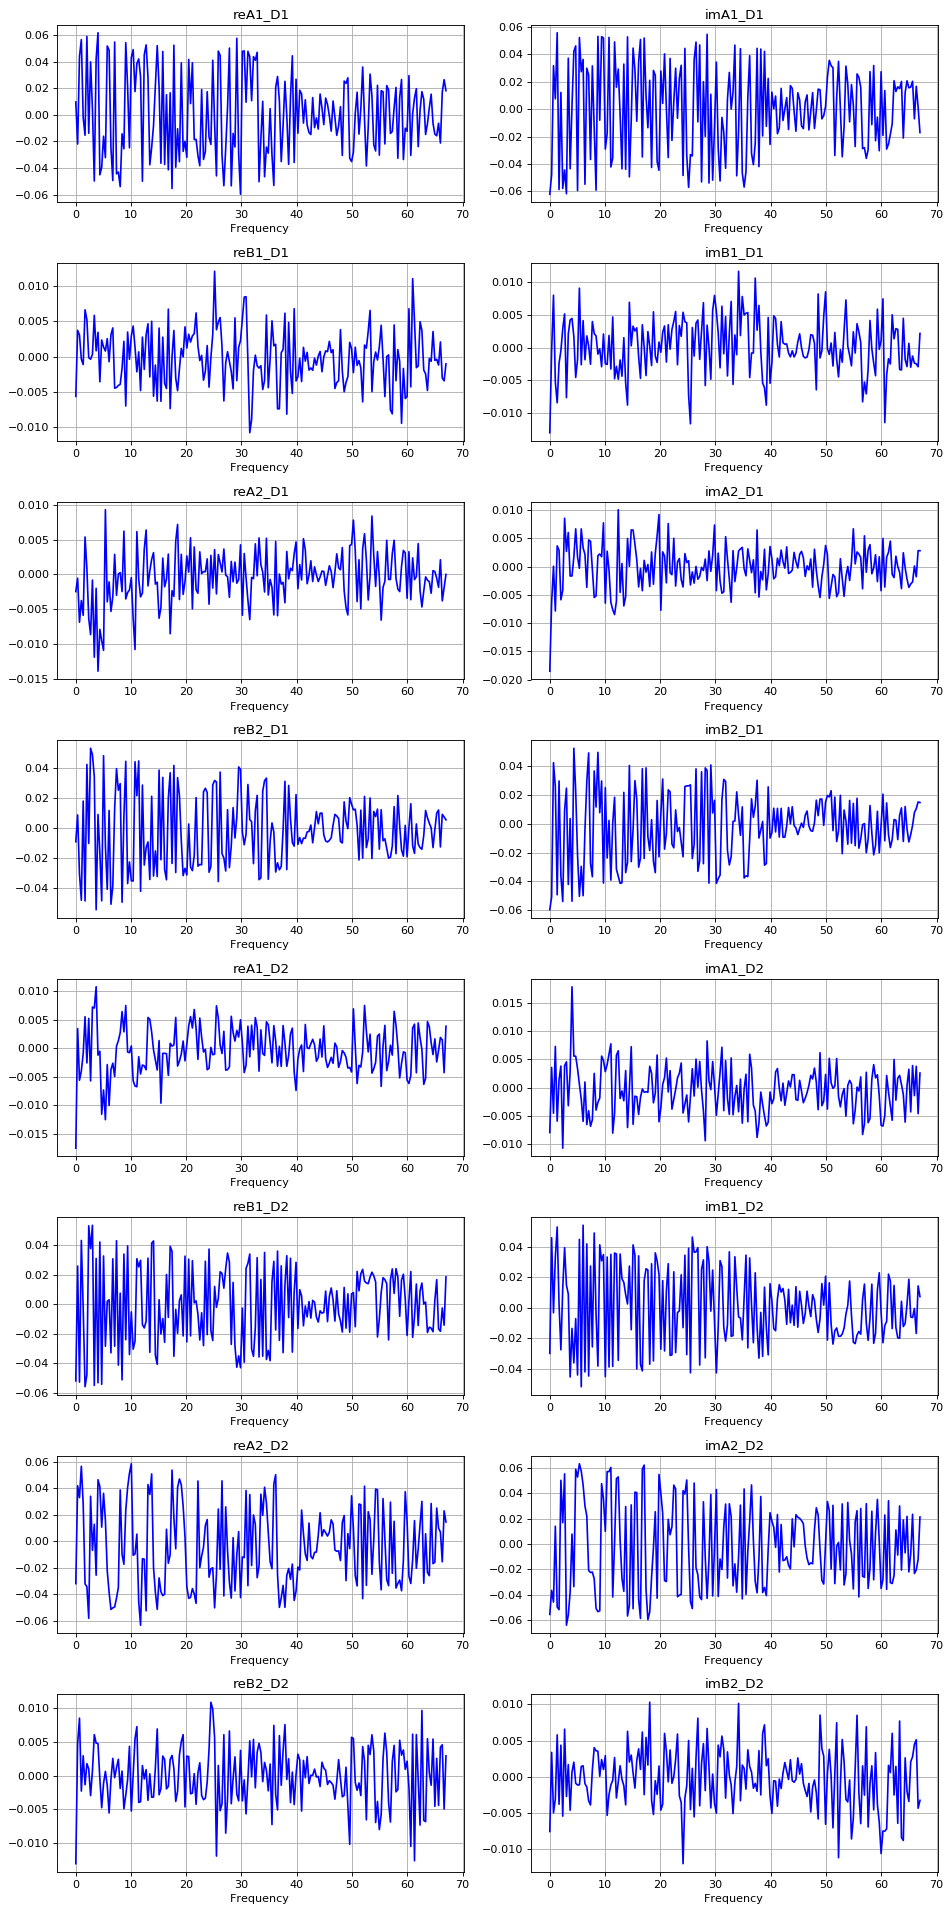

In [14]:
w2p.show();

### Changing the frequency of the sweep
set_frequency must have a start and stop defined, either number_points or step has to be specified, and the type is optional (defaults to LIN, LOG is the other possibility). The ability to use segmented sweeps relies on add_segment. The start, stop and number of points is added to the segment table. The attribute vna.frequency_table holds the table that is written to the vna. 

In [18]:
vna.initialize(reset="False")

In [20]:
vna.set_frequency(10**9,10**10,101)

In [25]:
s2p=vna.measure_sparameters()

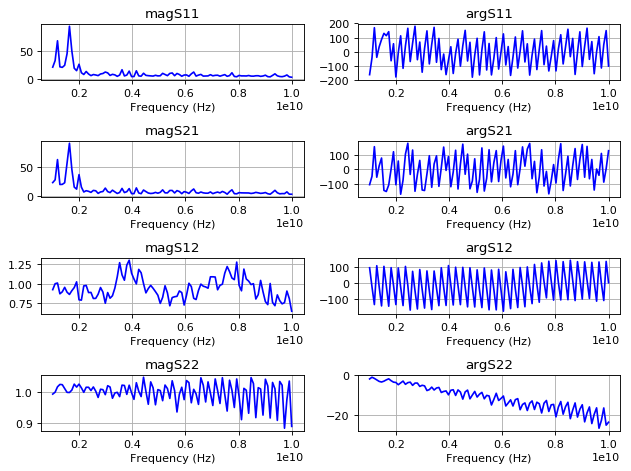

In [27]:
# Note these sparameters are messed up on port 1
s2p.show();